In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def mnk(t, a): # t == x, a == y
    xy = 0
    xx = 0
    yy = 0
    x = 0
    y = 0
    for j in range(len(t)):
        xy += t[j] * a[j]
        x += t[j]
        y += a[j]
        xx += t[j] * t[j]
        yy += a[j] * a[j]
    xy /= len(t)
    xx /= len(t)
    yy /= len(t)
    x /= len(t)
    y /= len(t)
    k = float((xy - x * y) / (xx - x ** 2))
    b = float(y - k * x)
    rk = float((1 / (len(t) ** 0.5)) * ((yy - y ** 2) / (xx - x ** 2) - k ** 2) ** 0.5)
    rb = float(rk * (xx - x ** 2) ** 0.5)
    k_b_rk_rb = [k, b, rk, rb]
    return k_b_rk_rb

In [16]:
error = []
x = np.linspace(0, 10, 1000)
y = np.exp(x)
with open("data5.txt") as f:
    y_old = [float(i) for i in f.readlines()]
    error.append(max(abs(y_old - y)))
with open("data10.txt") as f:
    y_old = [float(i) for i in f.readlines()]
    error.append(max(abs(y_old - y)))
with open("data20.txt") as f:
    y_old = [float(i) for i in f.readlines()]
    error.append(max(abs(y_old - y)))
with open("data40.txt") as f:
    y_old = [float(i) for i in f.readlines()]
    error.append(max(abs(y_old - y)))
with open("data80.txt") as f:
    y_old = [float(i) for i in f.readlines()]
    error.append(max(abs(y_old - y)))
with open("data160.txt") as f:
    y_old = [float(i) for i in f.readlines()]
    error.append(max(abs(y_old - y)))  
N = np.array([5, 10, 20, 40, 80, 160])
error = np.array(error)

[4.27516818e+03 1.17851226e+03 2.90074927e+02 7.04790279e+01
 1.72705228e+01 4.18382989e+00]


Text(0, 0.5, 'логарифм ошибки')

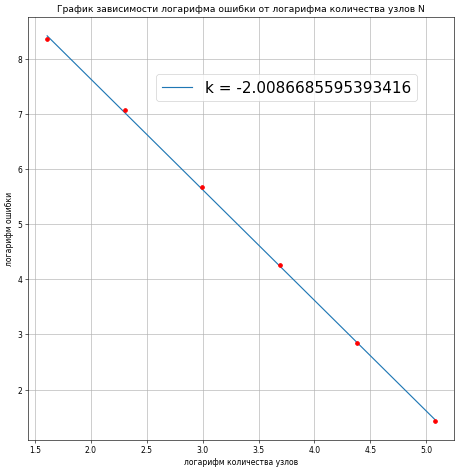

In [26]:
fig, ax = plt.subplots(figsize=(10, 10), dpi=55)
ax.grid()

for i in range(len(N)):
    plt.errorbar(np.log(N[i]), np.log(error[i]), color='r',   fmt='.', markersize = 10)
params = mnk(np.log(N), np.log(error))
plt.plot(np.log(N), np.polyval([params[0], params[1]], np.log(N)), label = "k = {}".format(params[0]))
plt.legend(prop={'size': 20}, loc = (0.3, 0.8))
plt.title("График зависимости логарифма ошибки от логарифма количества узлов N")
plt.xlabel("логарифм количества узлов")
plt.ylabel("логарифм ошибки")